In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Export_reference__mots_clefs.xlsx")
df

,REFERENCE,TITRE,MOTCLE,Unnamed: 3,Unnamed: 4
0,SPA 82 A 2979,Chanak Kalessi. Vue de la ville. [Légende d'or...,Militaire ; Ville ; Paysage ; Transport mariti...,NaN,NaN
1,D0388-020-001-2179,(F[or]t D[auphin]). Bastion du fort Flacourt. ...,Infrastructure militaire ; Bastion ; Architect...,NaN,NaN
2,D0370-002-001-0009,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Béret ; Montre ;...,NaN,NaN
3,D0370-002-001-0010,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Béret ; Montre ;...,NaN,NaN
4,D0370-002-001-0011,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Troupes aéroport...,NaN,NaN
...,...,...,...,...,...
132114,2021_ECPAD_053_X_003_435,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Armée Allemagne...,NaN,NaN
132115,2021_ECPAD_053_X_003_438,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Croix de Lorraine,NaN,NaN
132116,2021_ECPAD_053_X_003_439,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Croix de Lorraine,NaN,NaN
132117,2021_ECPAD_053_X_003_444,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Armée Allemagne...,NaN,NaN


In [3]:
df.dtypes

REFERENCE     object
TITRE         object
MOTCLE        object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [5]:
df = df.drop(["Unnamed: 3","Unnamed: 4"], axis=1).astype("str")


In [6]:
df_mot_cle = df["MOTCLE"]

def split_word(el : str):
    return el.split(";")
df_mot_cle = df_mot_cle.apply(split_word)
df_mot_cle

0         [Militaire ,  Ville ,  Paysage ,  Transport ma...
1         [Infrastructure militaire ,  Bastion ,  Archit...
2         [Population civile ,  Soigner ,  Béret ,  Mont...
3         [Population civile ,  Soigner ,  Béret ,  Mont...
4         [Population civile ,  Soigner ,  Troupes aérop...
                                ...                        
132114    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
132115    [Musée ,  Libération ,  Drapeau ,  Croix de Lo...
132116    [Musée ,  Libération ,  Drapeau ,  Croix de Lo...
132117    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
132118    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
Name: MOTCLE, Length: 132119, dtype: object

In [7]:
import random
random.shuffle(df_mot_cle)
df_mot_cle[:100]

0     [OTAN ,  Mission "Lynx" ,  Exercice ,  Entraîn...
1     [Paysage ,  Campagne ,  Agriculture ,  Champ ,...
2     [Soldat ,  Sourire ,  Véhicule militaire Franc...
3     [Fonds privés ,  Architecture ,  Habitation , ...
4     [Opération Barkhane ,  2e REI ,  Légion Etrang...
                            ...                        
95    [ECPAD ,  Visite ,  Personnel civil ,  Ordinat...
96    [Religion ,  Art ,  Artisanat ,  Inscription ,...
97    [Débarquement ,  Plage ,  Blindé France ,  AMX...
98    [Désert ,  Blindé de reconnaissance France pos...
99                                 [Cimetière ,  Croix]
Name: MOTCLE, Length: 100, dtype: object

Perform a One hot encoding with sklearn

In [8]:
def delete_quote(l: [str]):
    for i,s in enumerate(l):#type: str
        l[i] = s.replace('"',"").replace(" ","")
    return l
df_mot_cle = df_mot_cle.map(delete_quote)

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
df_light = df_mot_cle[:4000]
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(df_light),columns=mlb.classes_,index=df_light.index)
res

,"10,5cmleFH18",101eRG,101eRI,105mm,105mmHowM2A1(France),105mmM2A1,105mmobusier,106mmSR,107eRI,10eDI,...,WestPoint,WestlandLynx,WestlandLynx(France),Wiesel,Wrecker,XeRM,Zeppelin,Zodiac,Zouave,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
len(res)

4000

In [11]:
sum_df = res.sum().sort_values(ascending=False)
sum_df

Portrait              409
OpérationBarkhane     270
Soldat                265
Arbre                 265
Populationcivile      257
                     ... 
Filanzane               1
FaunSLT56Franziska      1
Falaise                 1
FTCV                    1
nan                     1
Length: 3158, dtype: int64

In [12]:
sum_df.apply(lambda x: x/len(res)*100)

Portrait              10.225
OpérationBarkhane      6.750
Soldat                 6.625
Arbre                  6.625
Populationcivile       6.425
                       ...  
Filanzane              0.025
FaunSLT56Franziska     0.025
Falaise                0.025
FTCV                   0.025
nan                    0.025
Length: 3158, dtype: float64

In [29]:
biggest_df = sum_df[:30]
biggest_df

Portrait              409
OpérationBarkhane     270
Soldat                265
Arbre                 265
Populationcivile      257
ONU                   246
Exercice              234
Désert                229
Cérémoniemilitaire    219
Casque                212
Giletpare-balles      200
Entraînement          200
Cimetière             198
Ville                 181
Carte                 180
Campmilitaire         168
Cheval                166
OTAN                  161
Immeuble              156
FAMAS                 153
Tombe                 151
FusilFrancepost45     149
MissionLynx           148
ArméedeTerre          145
Patrouille            145
Visite                142
FORPRONU              139
VAB                   139
LégionEtrangère       138
S-GTIALynx            136
dtype: int64

In [30]:
res_biggest = res[biggest_df.index]

In [31]:
corr = res_biggest.corr()

In [32]:
corr

,Portrait,OpérationBarkhane,Soldat,Arbre,Populationcivile,ONU,Exercice,Désert,Cérémoniemilitaire,Casque,...,Tombe,FusilFrancepost45,MissionLynx,ArméedeTerre,Patrouille,Visite,FORPRONU,VAB,LégionEtrangère,S-GTIALynx
Portrait,1.000000,0.113114,-0.003637,-0.016907,0.029351,0.020080,0.074093,-0.005027,0.042101,0.148515,...,-0.040869,0.099191,0.064989,0.040499,0.027255,-0.033532,0.057612,0.021568,0.085401,0.073277
OpérationBarkhane,0.113114,1.000000,-0.071665,-0.015575,0.022971,-0.064725,0.030592,0.332596,-0.029709,0.301075,...,-0.053290,0.131245,-0.052737,-0.052179,0.161070,-0.046232,-0.051049,0.046886,0.145695,-0.050475
Soldat,-0.003637,-0.071665,1.000000,-0.042661,-0.004207,0.048962,-0.044982,-0.005068,-0.011085,-0.036095,...,0.585380,-0.020548,-0.052211,0.131182,-0.014016,-0.040238,0.108619,-0.023099,-0.017307,-0.049972
Arbre,-0.016907,-0.015575,-0.042661,1.000000,-0.041101,-0.038899,0.177732,-0.044007,-0.059687,0.116450,...,-0.031663,0.059069,0.256637,-0.040904,-0.003260,-0.051102,-0.034075,-0.017610,0.037767,0.221797
Populationcivile,0.029351,0.022971,-0.004207,-0.041101,1.000000,0.098436,-0.060972,0.010036,-0.031690,-0.016479,...,-0.025152,0.050753,-0.029757,-0.023545,0.096463,-0.033741,0.067190,0.061623,-0.004841,-0.032282
ONU,0.020080,-0.064725,0.048962,-0.038899,0.098436,1.000000,-0.037206,-0.063083,-0.020440,-0.037335,...,-0.050703,0.004597,-0.050177,0.017161,0.083970,-0.015369,0.474157,0.093475,-0.008478,-0.048025
Exercice,0.074093,0.030592,-0.044982,0.177732,-0.060972,-0.037206,1.000000,0.080717,-0.059991,0.326175,...,-0.049372,0.170348,0.312315,-0.025547,-0.042644,-0.047822,-0.018214,0.103930,0.139654,0.329422
Désert,-0.005027,0.332596,-0.005068,-0.044007,0.010036,-0.063083,0.080717,1.000000,-0.059307,0.076195,...,-0.048809,0.031081,-0.048303,0.147955,0.044324,-0.035646,-0.046757,0.094259,0.047756,-0.046232
Cérémoniemilitaire,0.042101,-0.029709,-0.011085,-0.059687,-0.031690,-0.020440,-0.059991,-0.059307,1.000000,-0.012788,...,-0.041903,0.144160,0.045975,0.006240,-0.046676,-0.034294,-0.021663,-0.033664,-0.003345,0.045806
Casque,0.148515,0.301075,-0.036095,0.116450,-0.016479,-0.037335,0.326175,0.076195,-0.012788,1.000000,...,-0.041002,0.265774,0.249214,0.001881,0.115315,-0.027295,-0.026608,0.028229,0.248763,0.245016


<AxesSubplot:>

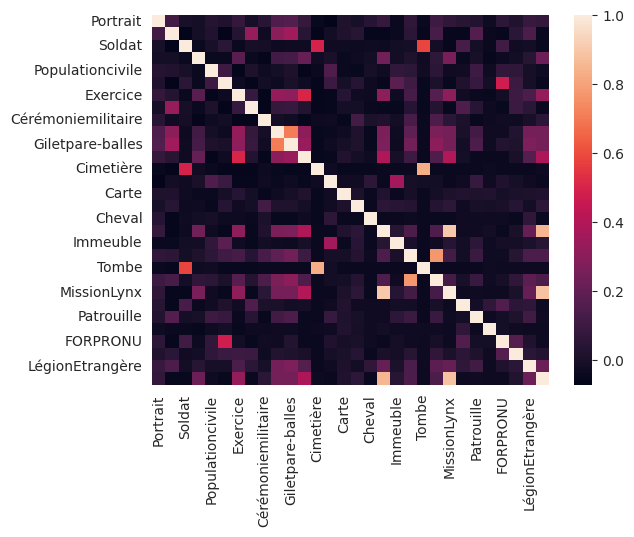

In [33]:
import seaborn  as sns
sns.heatmap(corr)

In [34]:
dict_cor = corr.to_dict()
for el in dict_cor: #type:dict
    dict_cor[el] = {k: v for k,v in dict_cor[el].items() if ( dict_cor[el][k] > 0.4 or dict_cor[el][k] < -0.4)and el != k}

In [35]:
dict_cor

{'Portrait': {},
 'OpérationBarkhane': {},
 'Soldat': {'Cimetière': 0.49529016397225556, 'Tombe': 0.5853796606059583},
 'Arbre': {},
 'Populationcivile': {},
 'ONU': {'FORPRONU': 0.4741569820519699},
 'Exercice': {'Entraînement': 0.5049000691340588},
 'Désert': {},
 'Cérémoniemilitaire': {},
 'Casque': {'Giletpare-balles': 0.708624836309784},
 'Giletpare-balles': {'Casque': 0.708624836309784},
 'Entraînement': {'Exercice': 0.5049000691340588},
 'Cimetière': {'Soldat': 0.49529016397225556, 'Tombe': 0.8316529709787415},
 'Ville': {},
 'Carte': {},
 'Campmilitaire': {},
 'Cheval': {},
 'OTAN': {'MissionLynx': 0.9032503520147134, 'S-GTIALynx': 0.8529413861764664},
 'Immeuble': {},
 'FAMAS': {'FusilFrancepost45': 0.7729580881532396},
 'Tombe': {'Soldat': 0.5853796606059583, 'Cimetière': 0.8316529709787415},
 'FusilFrancepost45': {'FAMAS': 0.7729580881532396},
 'MissionLynx': {'OTAN': 0.9032503520147134, 'S-GTIALynx': 0.8840330095136191},
 'ArméedeTerre': {},
 'Patrouille': {},
 'Visite': {}